In [327]:
import sys, os, time, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
dir_name = '/Users/gideonidumah/openmc_project/'
kernel_rf = 'RF/'
d_sizes = ['small', 'medium', 'large', 'XXL']

obj_rf = {}
for s in d_sizes:
    rates = pd.read_csv(f'{dir_name}{kernel_rf}{s}_problem.csv')['objective']
    obj_rf[s] = rates * -1

kernel_dummy = 'DUMMY/'
obj_dummy = {}
for s in d_sizes:
    rates = pd.read_csv(f'{dir_name}{kernel_dummy}{s}_problem.csv')['objective']
    obj_dummy[s] = rates * -1

In [329]:
gathered = []

d_sizes = ['small', 'medium', 'large', 'XXL']


for d_size in d_sizes:
    
    t = 0
    evals = []
    
    kernel_rf = 'RF/'
    file_rf = f'{dir_name}{kernel_rf}{d_size}_problem.csv'
    evals_rf = np.array(pd.read_csv(file_rf)['objective'])
    evals_rf *= -1
    n_rf = len(evals_rf)
    T_rf = np.array(pd.read_csv(file_rf)['elapsed_sec'])
    evals.extend(evals_rf)
    plot_rf = []
    best_rf = 0
    idx_rf = 0
    t_rf = T_rf[idx_rf] # picks the elapsed time
    
    kernel_dummy = 'DUMMY/'
    file_dummy = f'{dir_name}{kernel_dummy}{d_size}_problem.csv'
    evals_dummy = np.array(pd.read_csv(file_dummy)['objective'])
    evals_dummy *= -1
    n_dummy = len(evals_dummy)
    T_dummy = np.array(pd.read_csv(file_dummy)['elapsed_sec'])
    evals.extend(evals_dummy)
    plot_dummy = []
    best_dummy = 0
    idx_dummy = 0
    t_dummy = T_dummy[idx_dummy] # picks the elapsed time
    
    T_max = int(max(T_rf.max(), T_dummy.max()))
     
    
    while t < T_max:
        try:
            if t_rf < t and idx_rf <= n_rf-1:
                rf_tmp = float(evals_rf[idx_rf])
                if rf_tmp > best_rf:
                    best_rf = rf_tmp
                plot_rf.append(best_rf)
                idx_rf += 1
                if idx_rf <= n_rf-1:
                    t_rf = T_rf[idx_rf]
            elif idx_rf == n_rf or best_rf == 0:
                pass
            else:
                plot_rf.append(best_rf)
        except IndexError:
            pass
        
        try:
            if t_dummy < t and idx_dummy <= n_dummy-1:
                dummy_tmp = float(evals_dummy[idx_dummy])
                if dummy_tmp > best_dummy:
                    best_dummy = dummy_tmp
                plot_dummy.append(best_dummy)
                idx_dummy += 1
                
                if idx_dummy <= n_dummy-1:
                    t_dummy = T_dummy[idx_dummy]
                    
            elif idx_dummy == n_dummy or best_dummy == 0:
                pass
            else:
                plot_dummy.append(best_dummy)
        except IndexError:
            pass
        
        t += 1
        
    cc = {}
    cc['rf'] = plot_rf
    cc['dummy'] = plot_dummy
    
    gathered.append(cc)

In [307]:
baselines = [2192.58, 55963, 250415.0, 330504.0, 486000]

In [303]:
cc.keys()

dict_keys(['rf', 'dummy'])

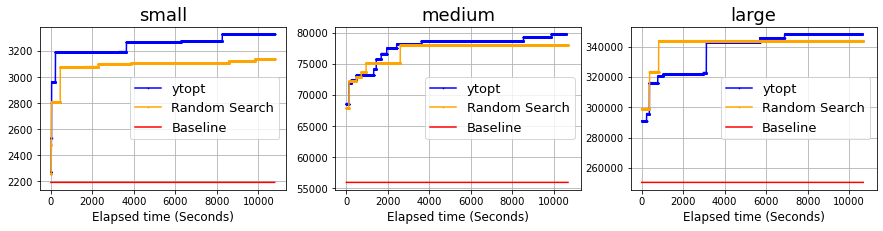

In [334]:
fig, axs = plt.subplots(1,3, figsize=(15, 3), sharex=True, sharey=False)
BEST = []

d_sizes = ['small', 'medium', 'large']


for ax, cc, d_size, baseline in zip(axs.flat, gathered, d_sizes, baselines):
    
    dict_s = cc
    
    for k, v in dict_s.items():    
        if k == 'rf':
            k = 'ytopt'
            color = 'blue'
            
        if k == 'dummy':
            k = 'Random Search'
            color = 'orange'
    
        BEST.append(v[-1])
        ax.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
        
    ax.plot(range(1, len(v) + 1), baseline*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
    ax.legend(fontsize=13)


#     ax.set_ylabel('Best speedup so far', fontsize=12)
    ax.set_xlabel('Elapsed time (Seconds)', fontsize=12)
    ax.set_title(d_size, fontsize=18)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    ax.grid()

In [296]:
baselines[-1]

486000

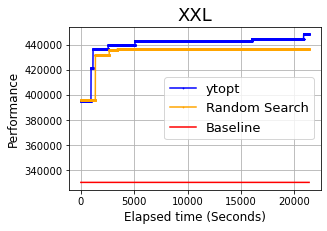

In [340]:
plt.figure(figsize=(4.5,3))

for k, v in gathered[-1].items():    
    if k == 'rf':
        k = 'ytopt'
        color = 'blue'
        
    if k == 'dummy':
        k = 'Random Search'
        color = 'orange'

    BEST.append(v[-1])
    plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)

# plt.plot(range(1, len(v) + 1), baselines[-1]*np.ones(len(v)), '--', label='Best Known', linewidth=1.5, markersize=1.5,color='red')
plt.plot(range(1, len(v) + 1), baselines[-2]*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
plt.legend(fontsize=13)
plt.ylabel('Performance', fontsize=12)
plt.xlabel('Elapsed time (Seconds)', fontsize=12)
plt.title('XXL', fontsize=18)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.grid()

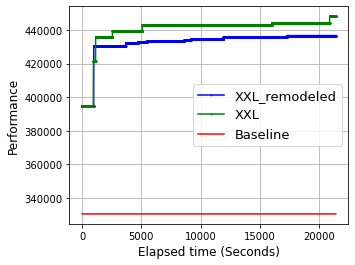

In [324]:
plt.figure(figsize=(5,4))

for i in [-1, -2]:
    for k, v in gathered[i].items():    
        if k == 'rf' and i == -1:
            k = 'XXL_remodeled'
            color = 'blue'
            BEST.append(v[-1])
            plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
#             plt.title(k, fontsize=18)
        
        if k == 'rf' and i == -2:
            k = 'XXL'
            color = 'green'
            BEST.append(v[-1])
            plt.plot(range(1, len(v) + 1), v, '.-', label=k, linewidth=1.5, markersize=1.5,color=color)
#             plt.title(k, fontsize=18)

        
        
    
    plt.ylabel('Performance', fontsize=12)
    plt.xlabel('Elapsed time (Seconds)', fontsize=12)
    
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    

# plt.plot(range(1, len(v) + 1), baselines[-1]*np.ones(len(v)), '--', label='Best Known', linewidth=1.5, markersize=1.5,color='red')
plt.plot(range(1, len(v) + 1), baselines[-2]*np.ones(len(v)), '-', label='Baseline', linewidth=1.5, markersize=1.5,color='red')
plt.legend(fontsize=13)
plt.grid()